In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# load data

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
print(train_data.shape)
print(test_data.shape)

(4209, 378)
(4209, 377)


In [5]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
for i in train_data.columns:
    data_type = train_data[i].dtype
    if data_type == 'object':
        print(i)

X0
X1
X2
X3
X4
X5
X6
X8


In [9]:
# If for any column(s), the variance is equal to zero, then you need to remove those variable(s)

# drop 'ID' and 'y' columns
data = train_data.drop(columns={'ID','y'})

In [11]:
# Convert * columns to_numeric, coerce errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

In [12]:
# Calculate variance
variance = data.var()

In [15]:
# Identify columns with zero variance
zero_variance_columns = [col for col in variance.index if variance[col] == 0]

In [17]:
# Print names of columns with zero variance
null_values = 0
for col in zero_variance_columns:
    print('Name = ', col)
    null_values = null_values+1
print('No: of columns which has zero variance = ', null_values)

Name =  X11
Name =  X93
Name =  X107
Name =  X233
Name =  X235
Name =  X268
Name =  X289
Name =  X290
Name =  X293
Name =  X297
Name =  X330
Name =  X347
No: of columns which has zero variance =  12


In [18]:
# Optionally, dropping these columns from the original DataFrame
train_data = train_data.drop(columns = zero_variance_columns)

In [19]:
train_data.shape

(4209, 366)

In [20]:
# Check for null and null values for test and train sets

train_data.isnull().sum().any()

False

In [21]:
# Apply label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
train_data_feature = train_data.drop(columns={'y','ID'})
train_data_target = train_data.y
print(train_data_feature.shape)
print(train_data_target.shape)

(4209, 364)
(4209,)


In [23]:
train_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [24]:
train_data_feature['X0'] = le.fit_transform(train_data_feature.X0)
train_data_feature['X1'] = le.fit_transform(train_data_feature.X1)
train_data_feature['X2'] = le.fit_transform(train_data_feature.X2)
train_data_feature['X3'] = le.fit_transform(train_data_feature.X3)
train_data_feature['X4'] = le.fit_transform(train_data_feature.X4)
train_data_feature['X5'] = le.fit_transform(train_data_feature.X5)
train_data_feature['X6'] = le.fit_transform(train_data_feature.X6)
train_data_feature['X8'] = le.fit_transform(train_data_feature.X8)

In [25]:
# Perform dimensionality reduction
print(train_data_feature.shape)
print(train_data_target.shape)

(4209, 364)
(4209,)


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

In [27]:
 pca.fit(train_data_feature, train_data_target)

PCA(n_components=0.95)

In [29]:
train_data_feature_trans = pca.fit_transform(train_data_feature)
print(train_data_feature_trans.shape)

(4209, 6)


In [31]:
# Predicitng test_df values using XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [32]:
train_x, test_x, train_y, test_y = train_test_split(train_data_feature_trans, train_data_target, test_size=.3,random_state=7)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2946, 6)
(2946,)
(1263, 6)
(1263,)


In [33]:
# XGBoost's hyperparameters tuning manually

xgb_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.4, max_depth = 10, alpha = 6, n_estimators = 20)
model = xgb_reg.fit(train_x, train_y)
print('RMSE = ', sqrt(mean_squared_error(model.predict(test_x), test_y)))

RMSE =  11.931030029923855


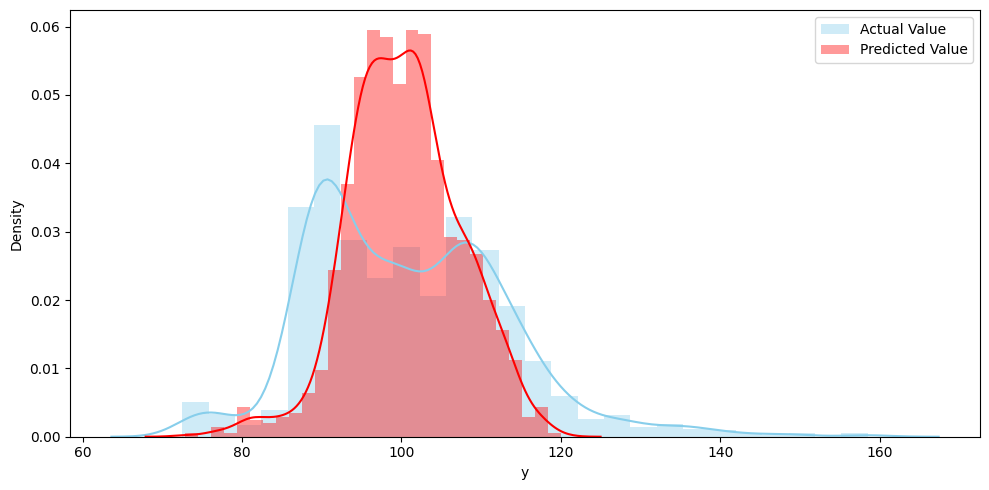

In [34]:
pred_test_y = model.predict(test_x)

plt.figure(figsize = (10, 5))
sns.distplot(test_y[test_y < 160], color="skyblue", label="Actual Value")
sns.distplot(pred_test_y[pred_test_y < 160], color="red", label="Predicted Value")
plt.legend()

plt.tight_layout()

In [35]:
# k-fold Cross Validation using XGBoost

dmatrix_train = xgb.DMatrix(data = train_data_feature_trans, label = train_data_target)

params = {'objective': 'reg:linear', 'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'alpha': 10}

model_cv = xgb.cv(dtrain = dmatrix_train, params=params, nfold=3, num_boost_round = 50, early_stopping_rounds = 10, metrics = "rmse", as_pandas = True, seed = 7)
model_cv.tail(4)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
27,9.809852,0.337705,11.062845,0.702510
28,9.779169,0.340962,11.060229,0.703283
29,9.693430,0.344139,11.002330,0.705271
30,9.661343,0.336968,10.995821,0.709161


In [36]:
# Prediction on test data set using XGBoost
# preparing  test dataset

test_data = test_data.drop(columns = zero_variance_columns)
test_data.shape

(4209, 365)

In [37]:
test_data.isnull().sum().any()

False

In [38]:
test_data_feature = test_data.drop(columns={'ID'})
print(test_data_feature.shape)

(4209, 364)


In [39]:
test_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [40]:
test_data_feature['X0'] = le.fit_transform(test_data_feature.X0)
test_data_feature['X1'] = le.fit_transform(test_data_feature.X1)
test_data_feature['X2'] = le.fit_transform(test_data_feature.X2)
test_data_feature['X3'] = le.fit_transform(test_data_feature.X3)
test_data_feature['X4'] = le.fit_transform(test_data_feature.X4)
test_data_feature['X5'] = le.fit_transform(test_data_feature.X5)
test_data_feature['X6'] = le.fit_transform(test_data_feature.X6)
test_data_feature['X8'] = le.fit_transform(test_data_feature.X8)

In [41]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [42]:
test_data_feature_trans = pca.fit_transform(test_data_feature)
print(test_data_feature_trans.shape)

(4209, 6)


In [43]:
test_pred = model.predict(test_data_feature_trans)
test_pred

array([ 85.42415 ,  98.37645 , 104.768906, ...,  91.64412 , 114.92604 ,
       100.023796], dtype=float32)

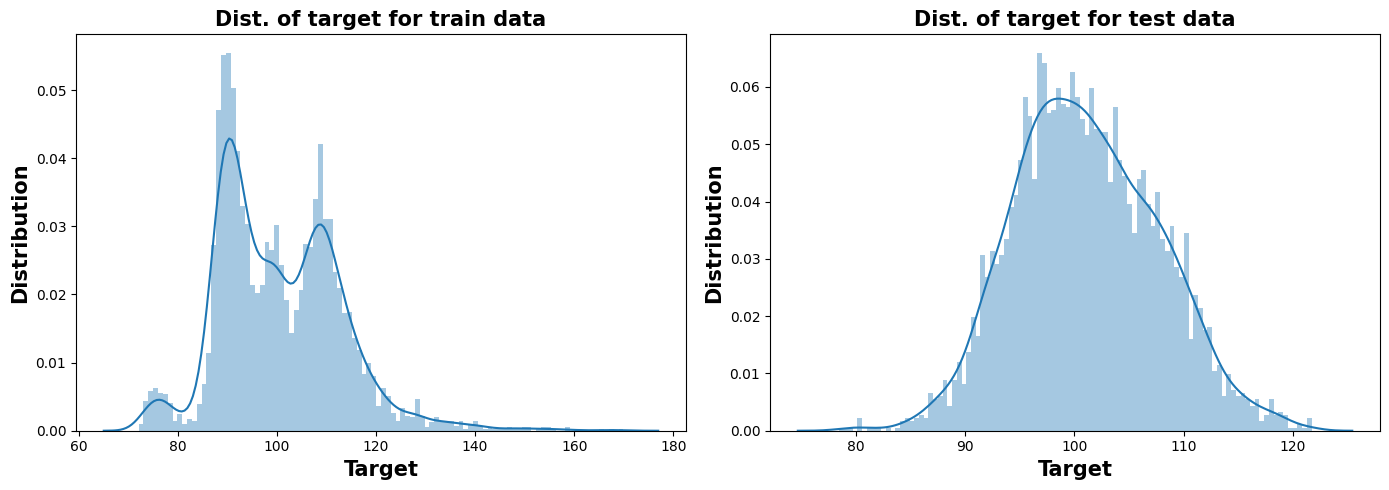

In [45]:
fix, ax = plt.subplots(1, 2, figsize = (14, 5))

train_plot = sns.distplot(train_data_target[train_data_target < 200], bins = 100, kde = True, ax = ax[0])
train_plot.set_xlabel('Target', weight = 'bold', size = 15)
train_plot.set_ylabel('Distribution', weight = 'bold', size = 15)
train_plot.set_title('Dist. of target for train data', weight = 'bold', size = 15)

test_plot = sns.distplot(test_pred[test_pred < 200], bins = 100, kde = True, ax = ax[1])
test_plot.set_xlabel('Target', weight = 'bold', size = 15)
test_plot.set_ylabel('Distribution', weight = 'bold', size = 15)
test_plot.set_title('Dist. of target for test data', weight = 'bold', size = 15)

plt.tight_layout()